In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
import plotly.graph_objs as go
import math
import sklearn
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy import stats
from scipy.interpolate import spline
import traceback
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import svm
from sklearn import preprocessing
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor, KDTree, BallTree
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import warnings

init_notebook_mode(connected=True)



In [3]:
data_path = "ghg_data/ghg.gid.site0001.dat"
df_data = pd.read_csv(data_path,sep=' ',header=None)
df_data = df_data.T
data_path = "ghg_data/ghg.gid.site"
for x in range(2,100):
    num=str(x)
    while(len(num)<4):
        num="0"+num
    
    dat = pd.read_csv((data_path+num+".dat"),sep=' ',header=None)
    dat = dat.T
    df_data = pd.concat([df_data,dat])
    
    
df_data.rename(columns={15:'synth'}, inplace=True)
df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,synth
0,0.000120,0.000125,0.000121,0.000121,0.000120,0.000121,0.020715,0.004181,0.045000,0.000122,0.017916,0.000800,0.000121,12.797520,0.000100,29.914910
1,0.000121,0.000121,0.000121,0.000121,0.000121,0.000121,0.000167,0.000133,0.000225,0.000121,0.001649,0.000392,0.000121,6.571398,0.000657,30.073300
2,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000132,0.000182,0.002674,0.000120,0.033579,0.000545,0.000118,8.581361,0.000100,14.728160
3,0.000101,0.000102,0.000104,0.000104,0.000103,0.000120,0.000178,0.000131,0.024433,0.000105,0.829274,0.018272,0.000121,7.308712,0.000100,14.791310
4,0.000781,0.010052,0.016668,0.000326,0.000801,0.000119,0.145980,0.030066,0.458566,0.002422,1.384007,1.474441,0.000134,79.297080,0.001020,39.866910
5,0.003268,0.028970,0.011653,0.000100,0.001523,0.000100,0.179421,0.000144,0.986505,0.001234,2.559436,2.238316,0.000209,37.012850,0.042639,5.462358
6,0.007287,0.058089,0.090014,0.008009,0.003441,0.002497,0.772752,0.543563,1.078212,0.206670,3.064599,13.685690,0.015330,212.471900,9.144225,152.467500
7,0.018816,0.684704,0.218313,0.038723,0.061974,0.012555,4.956254,1.954879,0.859636,0.356822,6.229111,33.063290,0.000896,12.874010,0.803380,36.472150
8,0.029782,0.568438,3.255026,0.384183,0.076932,0.004585,11.540880,6.127674,1.892153,0.214314,15.082510,24.692220,0.000345,44.616070,3.018163,54.076960
9,0.026135,0.607409,0.965903,0.061341,0.042309,0.000236,1.457196,0.093513,0.842245,0.007100,0.751596,0.664350,0.000167,33.947350,0.105869,49.728660


In [3]:

df_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,synth
count,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000,32373.000000
mean,0.008409,0.114421,0.316120,0.042463,0.012146,0.003327,2.063208,0.981191,0.396454,0.278689,1.573083,18.454852,1.851124,53.537838,1.742761,60.117903
std,0.010740,0.145045,0.439680,0.057041,0.017880,0.006371,2.532007,1.301995,0.467879,0.604361,1.849776,25.469826,4.403862,101.202019,2.643128,75.309407
min,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000612
25%,0.000612,0.011142,0.015574,0.002478,0.000946,0.000123,0.238167,0.090238,0.071400,0.002781,0.274284,1.424176,0.006237,2.818935,0.304031,14.450760
50%,0.003943,0.056426,0.128605,0.018769,0.005264,0.000387,1.216892,0.511480,0.263514,0.037961,1.009706,8.216814,0.170290,13.272030,0.978569,35.557480
75%,0.012714,0.166165,0.463209,0.062352,0.016681,0.003612,3.059260,1.349957,0.568604,0.248276,2.170538,24.477450,1.730047,50.097700,2.032494,74.669000
max,0.111943,1.191440,5.045808,0.550180,0.298138,0.077745,35.215010,16.924110,5.191184,7.019975,18.739430,284.565300,59.225940,1168.199000,55.904820,867.354200


In [4]:
df_data.shape

(32373, 16)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

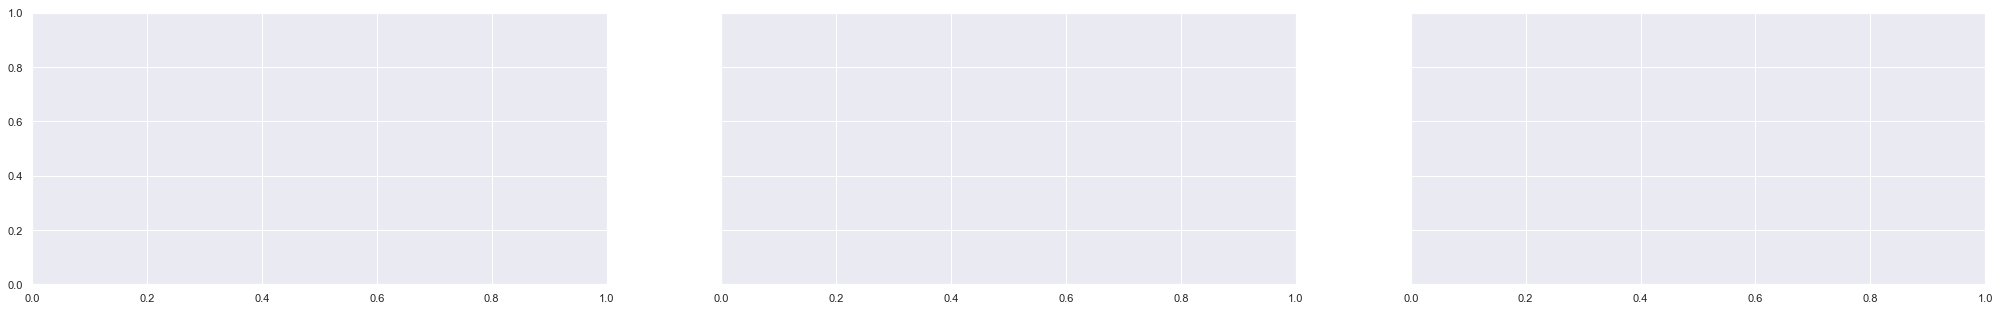

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

df_sample = df_data.sample(100000, random_state=1234)
df_sample.loc[:, df_sample.columns != 'synth'] = scaler.fit_transform(df_sample.loc[:, df_sample.columns != 'synth'])

max_idx = 15

sns.set(color_codes=True)
fig, (ax1, ax2, ax3)  = plt.subplots(ncols=3, sharey=True, figsize=(35,5)) 
cur_ax = ax1
for prop in df_sample.columns[1:max_idx+1]:
    sns.regplot(x='synth', y=prop, data=df_sample, ax=cur_ax)
    if cur_ax == ax1:
        cur_ax = ax2
    elif cur_ax == ax2:
        cur_ax = ax3
    elif cur_ax == ax3:
        plt.show()
        fig, (ax1, ax2, ax3)  = plt.subplots(ncols=3, sharey=True,  figsize=(35,5)) 
        cur_ax = ax1
        
plt.show()

Baseline MSE
-----------

In [5]:
X = df_data.loc[:, df_data.columns != 'synth']
y = df_data['synth']

meanY=[y.mean()]*len(y)
baseline_mse = mean_squared_error(y, meanY)
print('Baseline MSE (all values set to mean of train-data):',baseline_mse)

Baseline MSE (all values set to mean of train-data): 5671.331599247248


In [6]:
X = df_data.loc[:, df_data.columns != 'synth']
y = df_data['synth']

#Classifiers to be tested
names = ["Linear", "Ridge",
         "Elastic Net", "PLS",
        "Decision Tree", "Random Forest",
        "AdaBoost"]

classifiers = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    PLSRegression(),
    tree.DecisionTreeRegressor(min_samples_split=20),
    RandomForestRegressor(n_estimators=100),
    AdaBoostRegressor()
]
cl_scores = {}
scoring = {'mse': 'neg_mean_squared_error',
          'mae': 'neg_median_absolute_error'}

#for name, clf in zip(names, classifiers):
#    np.random.seed(1234)
#    scores = cross_validate(clf, X, y, cv=10, scoring="neg_mean_squared_error", return_train_score=True)
#    cl_scores[name] = scores
#    print(name,"-- Training Set --", "Mean", scores['train_score'].mean())
#    print(name,"-- Test Set --", "Mean", scores['test_score'].mean())
#    print()
for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, X, y, cv=10, scoring=scoring, return_train_score=True)
        cl_scores[name] = scores
        for score in scoring:
            print(name,"--",score,"-- Training Set --", "Mean", scores['train_'+score].mean(), "-- Min", scores['train_'+score].min(), "-- Max", scores['train_'+score].max())
            print(name,"--",score,"-- Test Set --", "Mean", scores['test_'+score].mean(), "-- Min", scores['test_'+score].min(), "-- Max", scores['test_'+score].max())
    except:
        print("Classification failed for", name)
        traceback.print_exc()    

Linear -- mse -- Training Set -- Mean -290.11500383759824 -- Min -296.5494818360916 -- Max -284.6930582728518
Linear -- mse -- Test Set -- Mean -290.6950355313987 -- Min -340.0677753819782 -- Max -232.8118351137918
Linear -- mae -- Training Set -- Mean -9.616787290770862 -- Min -9.839263188202217 -- Max -9.46579466552975
Linear -- mae -- Test Set -- Mean -9.638541178886216 -- Min -11.005460929178671 -- Max -7.5966308830796265
Ridge -- mse -- Training Set -- Mean -290.12294945644356 -- Min -296.5569050427265 -- Max -284.7042012758197
Ridge -- mse -- Test Set -- Mean -290.68185350492104 -- Min -339.9468754328117 -- Max -232.81803960433135
Ridge -- mae -- Training Set -- Mean -9.617122211153491 -- Min -9.829957625072542 -- Max -9.4662753233565
Ridge -- mae -- Test Set -- Mean -9.642474289521319 -- Min -11.02425613175069 -- Max -7.580780984646344
Elastic Net -- mse -- Training Set -- Mean -290.8747828280662 -- Min -297.3032490532265 -- Max -285.46841609100426
Elastic Net -- mse -- Test Set

In [3]:
X = df_data.loc[:, df_data.columns != 'synth']
X = preprocessing.scale(X)
y = df_data['synth']

#Classifiers to be tested
names = ["Linear", "Ridge",
         "Elastic Net", "PLS",
        "Decision Tree", "Random Forest",
        "AdaBoost"]

classifiers = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    PLSRegression(),
    tree.DecisionTreeRegressor(min_samples_split=20),
    RandomForestRegressor(n_estimators=100),
    AdaBoostRegressor()
]
cl_scores = {}
scoring = {'mse': 'neg_mean_squared_error',
          'mae': 'neg_median_absolute_error'}

#for name, clf in zip(names, classifiers):
#    np.random.seed(1234)
#    scores = cross_validate(clf, X, y, cv=10, scoring="neg_mean_squared_error", return_train_score=True)
#    cl_scores[name] = scores
#    print(name,"-- Training Set --", "Mean", scores['train_score'].mean())
#    print(name,"-- Test Set --", "Mean", scores['test_score'].mean())
#    print()
for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, X, y, cv=10, scoring=scoring, return_train_score=True)
        cl_scores[name] = scores
        for score in scoring:
            print(name,"--",score,"-- Training Set --", "Mean", scores['train_'+score].mean(), "-- Min", scores['train_'+score].min(), "-- Max", scores['train_'+score].max())
            print(name,"--",score,"-- Test Set --", "Mean", scores['test_'+score].mean(), "-- Min", scores['test_'+score].min(), "-- Max", scores['test_'+score].max())
    except:
        print("Classification failed for", name)
        traceback.print_exc()    

Linear -- mse -- Training Set -- Mean -290.11500383759824 -- Min -296.5494818360916 -- Max -284.6930582728518
Linear -- mse -- Test Set -- Mean -290.69503553139856 -- Min -340.0677753819776 -- Max -232.81183511379174
Linear -- mae -- Training Set -- Mean -9.616787290770871 -- Min -9.839263188202153 -- Max -9.465794665529671
Linear -- mae -- Test Set -- Mean -9.638541178886205 -- Min -11.005460929178637 -- Max -7.5966308830795874
Ridge -- mse -- Training Set -- Mean -290.1150107571541 -- Min -296.5494880962523 -- Max -284.69306656512686
Ridge -- mse -- Test Set -- Mean -290.6955138613616 -- Min -340.0798275059669 -- Max -232.81022974308326
Ridge -- mae -- Training Set -- Mean -9.617488757141711 -- Min -9.83909339547104 -- Max -9.465800676379224
Ridge -- mae -- Test Set -- Mean -9.638483244567128 -- Min -11.004142549012089 -- Max -7.595328264200351
Elastic Net -- mse -- Training Set -- Mean -875.9676929117371 -- Min -897.6711541316461 -- Max -860.3544211057456
Elastic Net -- mse -- Test 

In [16]:
X = df_data.loc[:, df_data.columns != 'synth']
y = df_data['synth']

#Classifiers to be tested
names = ["Linear", "Ridge",
         "Elastic Net", "PLS",
        "Decision Tree", #"Random Forest",
        "AdaBoost"]

classifiers = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    PLSRegression(),
    tree.DecisionTreeRegressor(min_samples_split=20),
    #RandomForestRegressor(n_estimators=100),
    AdaBoostRegressor()
]
cl_scores = {}
for name in names:
    cl_scores[name] = []
scoring = {'mse': 'neg_mean_squared_error',
          'mae': 'neg_median_absolute_error'}


for feature_count in [2,3,4,5,9,11,13,15]:
    X_selected = SelectKBest(f_regression, k=feature_count).fit_transform(X,y)
    print("----------------------------------")    
    print("Feature count=", feature_count)
    for name, clf in zip(names, classifiers):
        try:
            np.random.seed(32143421)
            scores = cross_validate(clf, X_selected, y, cv=10, scoring=scoring, return_train_score=True)
            cl_scores[name].append(scores)
            for score in scoring:
                print(name,"--",score,"-- Training Set --", "Mean", scores['train_'+score].mean(), "-- Min", scores['train_'+score].min(), "-- Max", scores['train_'+score].max())
                print(name,"--",score,"-- Test Set --", "Mean", scores['test_'+score].mean(), "-- Min", scores['test_'+score].min(), "-- Max", scores['test_'+score].max())
        except:
            print("Classification failed for", name)
            traceback.print_exc()    


----------------------------------
Feature count= 2
Linear -- mse -- Training Set -- Mean -308.4405073558966 -- Min -315.49627576476115 -- Max -303.3720601941325
Linear -- mse -- Test Set -- Mean -308.8457095597949 -- Min -355.2032321834993 -- Max -245.18730700979188
Linear -- mae -- Training Set -- Mean -9.957934106769637 -- Min -10.091223117189742 -- Max -9.876520469253727
Linear -- mae -- Test Set -- Mean -10.107796616378689 -- Min -11.110192231672936 -- Max -8.949802729046421
Ridge -- mse -- Training Set -- Mean -308.4405073558977 -- Min -315.49627576476206 -- Max -303.3720601941335
Ridge -- mse -- Test Set -- Mean -308.84570957616745 -- Min -355.2032324201794 -- Max -245.18730659198494
Ridge -- mae -- Training Set -- Mean -9.95793431454791 -- Min -10.091222476158592 -- Max -9.87651983322382
Ridge -- mae -- Test Set -- Mean -10.10779674867737 -- Min -11.110192394655192 -- Max -8.949803282341282
Elastic Net -- mse -- Training Set -- Mean -308.44169200781005 -- Min -315.4974320872418

Ridge -- mse -- Training Set -- Mean -304.44560193952094 -- Min -311.1932011506875 -- Max -299.7523094817458
Ridge -- mse -- Test Set -- Mean -305.1130276611244 -- Min -348.37805660769163 -- Max -244.22002474148286
Ridge -- mae -- Training Set -- Mean -9.833076196390731 -- Min -10.053742703042554 -- Max -9.695708445492095
Ridge -- mae -- Test Set -- Mean -9.851941537013818 -- Min -11.228023951055778 -- Max -8.026990917280173
Elastic Net -- mse -- Training Set -- Mean -306.34985566105854 -- Min -313.1521191183693 -- Max -301.5633266976525
Elastic Net -- mse -- Test Set -- Mean -306.8939266609176 -- Min -351.76509751472736 -- Max -244.78636605549107
Elastic Net -- mae -- Training Set -- Mean -9.837305306638687 -- Min -10.053989400578587 -- Max -9.683594263094022
Elastic Net -- mae -- Test Set -- Mean -9.981866813512255 -- Min -11.227521750090638 -- Max -8.602650454690181
PLS -- mse -- Training Set -- Mean -318.6717649406025 -- Min -326.3979620113411 -- Max -310.88516248789216
PLS -- mse 

Elastic Net -- mse -- Training Set -- Mean -296.6780254841959 -- Min -302.97779452670136 -- Max -291.37719698629553
Elastic Net -- mse -- Test Set -- Mean -297.44710973125274 -- Min -345.76384953107055 -- Max -239.76822368908387
Elastic Net -- mae -- Training Set -- Mean -9.686821691803999 -- Min -9.882624943177511 -- Max -9.54893563438766
Elastic Net -- mae -- Test Set -- Mean -9.727366502163637 -- Min -11.232742795024855 -- Max -7.7699118403139975
PLS -- mse -- Training Set -- Mean -404.54914010875547 -- Min -418.24151396747385 -- Max -384.23173064008347
PLS -- mse -- Test Set -- Mean -409.596339060043 -- Min -507.73044093214884 -- Max -294.7739679594631
PLS -- mae -- Training Set -- Mean -11.827327333939182 -- Min -12.079607840553962 -- Max -11.453334689935511
PLS -- mae -- Test Set -- Mean -11.87714370662539 -- Min -14.097965748804729 -- Max -9.083287497005912
Decision Tree -- mse -- Training Set -- Mean -134.33573887995266 -- Min -137.18876279297712 -- Max -131.41993825356792
Deci

In [5]:
import plotly.io as pio
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_mse']*-1,
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="MSE on 100 files (Greenhouse Gas Observing) - Scaled")
    
py.iplot(go.Figure(data=traces, layout=layout))
pio.write_image(go.Figure(data=traces, layout=layout), 'greenhouse_boxplot_100files_scaled.pdf')

In [20]:
names = ["Linear", "Ridge",
         "Elastic Net", "PLS",
        "Decision Tree", #"Random Forest",
        "AdaBoost"]

classifiers = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    PLSRegression(),
    tree.DecisionTreeRegressor(min_samples_split=20),
    #RandomForestRegressor(n_estimators=100),
    AdaBoostRegressor()
]
feature_counts = [2,3,4,5,9,11,13,15]
for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_mse']:
            trace.append({'score': score, 'x':idx, 'name':feature_count , 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)

In [19]:

trace = []
names = ["Linear", "Ridge",
         "Elastic Net", "PLS",
        "Decision Tree", #"Random Forest",
        "AdaBoost"]

classifiers = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.ElasticNet(),
    PLSRegression(),
    tree.DecisionTreeRegressor(min_samples_split=20),
    #RandomForestRegressor(n_estimators=100),
    AdaBoostRegressor()
]
feature_counts = [1,2,3,4,5,9,11,13,15]

for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_mse']:
            trace.append({'score': score, 'x':idx, 'name':feature_count , 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)


IndexError: list index out of range

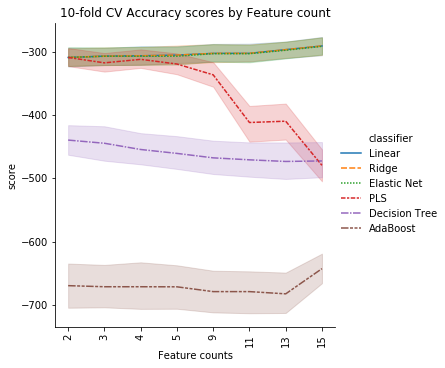

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="x", y="score", kind="line", hue="classifier", style="classifier", data=df_trace)
plt.xticks(range(len(feature_counts)), feature_counts, rotation='vertical')
plt.xlabel("Feature counts")
plt.title("10-fold CV Accuracy scores by Feature count")
axes = plt.gca()
#axes.set_ylim([0.5,0.61])
#axes.set_xlim([0,len(feature_counts)])
plt.savefig('feature_cnt_eval_greenhouse.pdf')
plt.show()

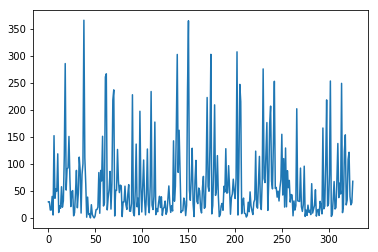

In [12]:
data_path = "ghg_data/ghg.gid.site0001.dat"
df_data = pd.read_csv(data_path,sep=' ',header=None)
df_data = df_data.T
f=df_data[15].plot()
plt.savefig('file1.pdf')

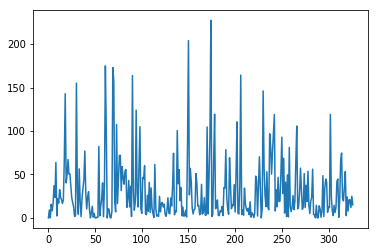

In [13]:
data_path = "ghg_data/ghg.gid.site0002.dat"
df_data = pd.read_csv(data_path,sep=' ',header=None)
df_data = df_data.T
df_data[15].plot()
plt.savefig('file2.pdf')

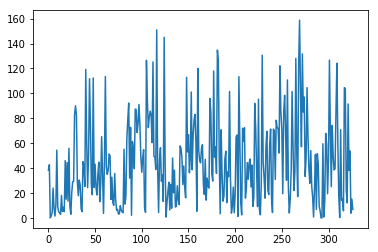

In [14]:
data_path = "ghg_data/ghg.gid.site0500.dat"
df_data = pd.read_csv(data_path,sep=' ',header=None)
df_data = df_data.T
df_data[15].plot()
plt.savefig('file500.pdf')

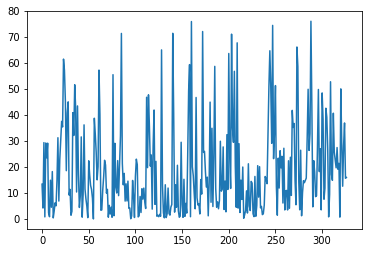

In [15]:
data_path = "ghg_data/ghg.gid.site2500.dat"
df_data = pd.read_csv(data_path,sep=' ',header=None)
df_data = df_data.T
df_data[15].plot()
plt.savefig('file2500.pdf')

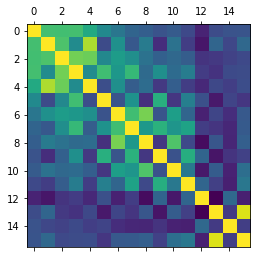

In [6]:
plt.matshow(df_data.corr())
plt.savefig('correlation_greenhouse.pdf')

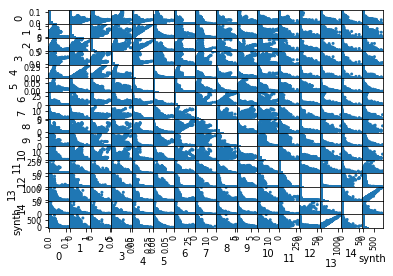

In [8]:
fig=pd.plotting.scatter_matrix(df_data, alpha=1)
#fig = plot.get_figure()
#plt.savefig(studentID+'_04.png', bbox_inches='tight')

In [16]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

X = df_data.loc[:, df_data.columns != 'synth']
y = df_data['synth']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

ModuleNotFoundError: No module named 'autosklearn'

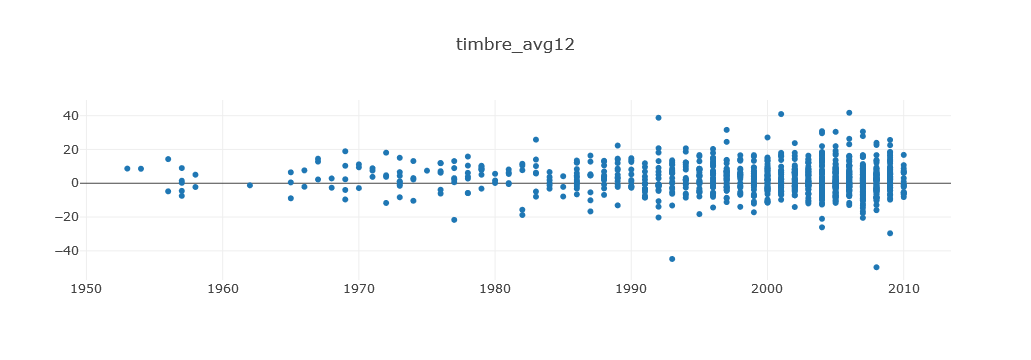

In [38]:
df_sample = df_train.sample(1000, random_state=120438)

prop = 'timbre_avg12'

trace = go.Scatter(
    x = df_sample['year'],
    y = df_sample[prop],
    mode = 'markers'
)

layout = go.Layout(
    title = prop
)

py.iplot(go.Figure(data = [trace], layout=layout))

## Baseline (always mean year)

In [47]:
pred = df_train['year'].median()
base_mse = mean_squared_error(df_test['year'], [pred for x in df_test['year']])
print("Baseline MSE: " + str(base_mse))
print("RMSE: " + str(math.sqrt(base_mse)))

Baseline MSE: 130.04365678868874
RMSE: 11.403668567118597


### Initialize Training data

In [48]:
df_vars = df_train.loc[:, df_train.columns != 'year']
df_class = df_train['year']

X_train, X_test, y_train, y_test = train_test_split(df_vars, df_class, test_size=test_set_ratio, random_state=0)

In [59]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
scores = cross_validate(reg, df_vars, df_class, cv=10, scoring='neg_mean_squared_error')
scores

E:\Python\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning:

You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True



{'fit_time': array([3.35913444, 3.17164826, 2.7029326 , 2.95291471, 2.79667521,
        2.76542735, 2.76542664, 3.3122654 , 3.93721795, 3.31226325]),
 'score_time': array([0.01562572, 0.01562476, 0.01562428, 0.03124809, 0.0624969 ,
        0.01562715, 0.01562643, 0.01562262, 0.03125215, 0.01562548]),
 'test_score': array([-87.91932093, -96.74794639, -89.25683172, -91.73925285,
        -92.33559424, -92.68895704, -92.82303468, -86.41194249,
        -96.49430302, -88.01818909]),
 'train_score': array([-91.63732249, -90.66176965, -91.48697235, -91.2090219 ,
        -91.1501166 , -91.11055676, -91.09507183, -91.80502951,
        -90.68663741, -91.62480126])}

### Simple cross validation for well-founded results

In [4]:
scores = cross_validate(clf, df_vars, df_class, cv=5)
scores['test_score']

# dt criterion=gini
# array([0.93854749, 0.9408284 , 0.93125   , 0.90728477, 0.96453901])

E:\Python\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
E:\Python\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.48883990073937794

### Hyper-parameter tuning

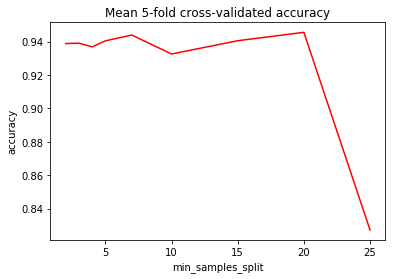

In [37]:
min_samples_splits = [2,3,4,5,7,10,15,20,25]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, df_vars, df_class, cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

### Neat hyperparameter evaluation

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



0 --- 1e-05
[0.08379888 0.06508876 0.075      0.05298013 0.06382979]
1 --- 0.0001
[0.51955307 0.50295858 0.5625     0.53642384 0.54609929]
2 --- 0.001
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
3 --- 0.01
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
4 --- 0.1
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
5 --- 1
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
6 --- 10
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
7 --- 100
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]
8 --- 1000
[0.58659218 0.56804734 0.625      0.60927152 0.60283688]


E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



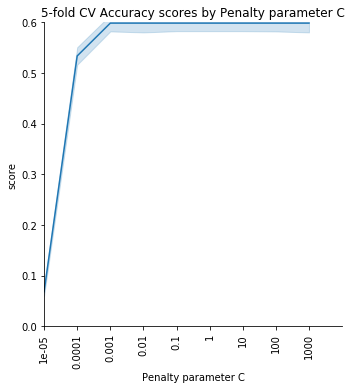

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_vars = preprocessing.scale(df_vars)
df_class = df_train['Class']

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf = SVC(kernel="linear", C=c)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("5-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

0 --- 2
Train [1. 1. 1. 1. 1.]
Test [0.37430168 0.33136095 0.40625    0.33774834 0.43262411]
1 --- 3
Train [0.93880837 0.93819334 0.9484375  0.94453005 0.94233687]
Test [0.34636872 0.36686391 0.3625     0.37086093 0.40425532]
2 --- 5
Train [0.8921095  0.8858954  0.9015625  0.88135593 0.88467375]
Test [0.36312849 0.36686391 0.39375    0.35761589 0.37588652]
3 --- 10
Train [0.79710145 0.79397781 0.8109375  0.78428351 0.81638847]
Test [0.3575419  0.35502959 0.4125     0.35761589 0.41134752]
4 --- 25
Train [0.6747182  0.65451664 0.6515625  0.62095532 0.68133536]
Test [0.36871508 0.37869822 0.3875     0.35761589 0.39007092]
5 --- 50
Train [0.568438   0.54833597 0.55625    0.52696456 0.53262519]
Test [0.34078212 0.34319527 0.375      0.33774834 0.40425532]
6 --- 100
Train [0.46698873 0.40095087 0.4140625  0.42526965 0.41274659]
Test [0.30726257 0.31360947 0.35       0.31125828 0.41134752]
7 --- 200
Train [0.30917874 0.34706815 0.3296875  0.32665639 0.30349014]
Test [0.25698324 0.27218935 0.3

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



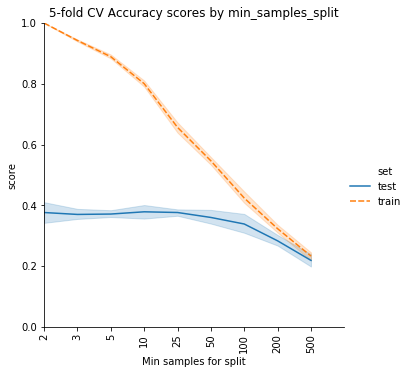

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [2,3,5,10,25,50,100,200,500]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(min_samples_split=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Min samples for split")
plt.title("5-fold CV Accuracy scores by min_samples_split")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mss_eval.pdf')
plt.show()

0 --- 0.01
Train [1. 1. 1. 1. 1.]
Test [0.20111732 0.16568047 0.1875     0.21854305 0.14893617]
1 --- 0.1
Train [1. 1. 1. 1. 1.]
Test [0.36312849 0.33727811 0.34375    0.39072848 0.32624113]
2 --- 0.25
Train [1. 1. 1. 1. 1.]
Test [0.31284916 0.31360947 0.36875    0.33774834 0.40425532]
3 --- 0.5
Train [1. 1. 1. 1. 1.]
Test [0.34078212 0.34319527 0.33125    0.33774834 0.46808511]
4 --- 0.75
Train [1. 1. 1. 1. 1.]
Test [0.38547486 0.35502959 0.3875     0.39072848 0.39007092]
5 --- None
Train [1. 1. 1. 1. 1.]
Test [0.37430168 0.33136095 0.40625    0.33774834 0.43262411]


E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



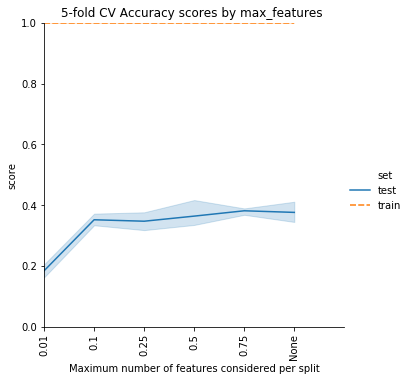

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [0.01, 0.1, 0.25, 0.5, 0.75, None]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(max_features=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Maximum number of features considered per split")
plt.title("5-fold CV Accuracy scores by max_features ")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mf_eval.pdf')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

params = [0.01, 0.1, 0.25, 0.5, 0.75, None]
results = []
for idx, c in enumerate(params):
    print(idx, "---", c)
    clf = DecisionTreeClassifier(max_features=c, random_state=32143421)
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5, return_train_score=True)
    print("Train", scores['train_score'])
    print("Test", scores['test_score'])
    for score in scores['test_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'test'})
    for score in scores['train_score']:
        results.append({'score': score, 'x':idx, 'penalty':c, 'set':'train'})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", hue="set", style="set", data=df_trace)
plt.xticks(range(len(params)), params, rotation='vertical')
plt.xlabel("Maximum number of features considered per split")
plt.title("5-fold CV Accuracy scores by max_features ")
axes = plt.gca()
axes.set_ylim([0.0,1])
axes.set_xlim([0,len(params)])
plt.savefig('amz_mf_eval.pdf')
plt.show()

### Scaled / Non-Scaled comparison

In [7]:
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars = df_vars_all.drop('ID', axis=1)
df_vars_scaled = preprocessing.scale(df_vars)
df_class = df_train['Class']

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

for name, clf in zip(names, classifiers):
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars, df_class, cv=5)['test_score']
    print(name, "Unscaled", scores.mean())
    np.random.seed(32143421)
    scores = cross_validate(clf, df_vars_scaled, df_class, cv=5)['test_score']
    print(name, "Scaled", scores.mean())

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Nearest Centroid Unscaled 0.22794987191154314
Nearest Centroid Scaled 0.6083086395982383
Linear SVM Unscaled 0.5190677786666922
Linear SVM Scaled 0.5983495837320977
Decision Tree Unscaled 0.3849839828100602
Decision Tree Scaled 0.38356554309374813
Naive Bayes Unscaled 0.33543017279437287
Naive Bayes Scaled 0.4303194954995865


### Model fitting and sample testing

In [49]:
model = clf.fit(X_train, y_train)
model.score(X_test, y_test)

0.925

### Final prediction

In [50]:
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = pd.Series(model.predict(df_test))
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


### Export

In [ ]:
export_file_name = result_folder + "svm_linear.csv"
df_res.to_csv(export_file_name, index=False)

### Easy comparison

In [5]:
import traceback
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)


df_vars_all = df_train.loc[:, df_train.columns != 'Class']
df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']

#df_vars = KNN(k=3).fit_transform(df_vars)

names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]

classifiers = [
    NearestCentroid(),
    SVC(kernel="linear"),
    DecisionTreeClassifier(),
    GaussianNB()]

cl_scores = {}
df_vars = preprocessing.scale(df_vars_all)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

for name, clf in zip(names, classifiers):
    try:
        np.random.seed(32143421)
        scores = cross_validate(clf, df_vars, df_class, cv=10, scoring=scoring, return_train_score=True)
        cl_scores[name] = scores
        for score in scoring:
            print(name,"--",score,"-- Training Set --", "Mean", scores['train_'+score].mean(), "-- Min", scores['train_'+score].min(), "-- Max", scores['train_'+score].max())
            print(name,"--",score,"-- Test Set --", "Mean", scores['test_'+score].mean(), "-- Min", scores['test_'+score].min(), "-- Max", scores['test_'+score].max())
    except:
        print("Classification failed for", name)
        traceback.print_exc()

E:\Python\Miniconda3\lib\site-packages\ipykernel_launcher.py:30: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



Nearest Centroid -- acc -- Training Set -- Mean 0.9740225828033011 -- Min 0.9701492537313433 -- Max 0.9775596072931276
Nearest Centroid -- acc -- Test Set -- Mean 0.6280452100034309 -- Min 0.5567010309278351 -- Max 0.7428571428571429
Nearest Centroid -- prec_macro -- Training Set -- Mean 0.9888808036646273 -- Min 0.9873153153153154 -- Max 0.99
Nearest Centroid -- prec_macro -- Test Set -- Mean 0.6019111832611832 -- Min 0.5094444444444445 -- Max 0.6863333333333332
Nearest Centroid -- rec_macro -- Training Set -- Mean 0.9731216781584429 -- Min 0.9695506356388711 -- Max 0.9763717948717948
Nearest Centroid -- rec_macro -- Test Set -- Mean 0.6203333333333334 -- Min 0.55 -- Max 0.72
Linear SVM -- acc -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- acc -- Test Set -- Mean 0.617778398775634 -- Min 0.5555555555555556 -- Max 0.7428571428571429
Linear SVM -- prec_macro -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- prec_macro -- Test Set -- Mean 0.5811802752802753

### all features
Nearest Centroid -- Training Set -- Mean 0.7496791822186778 -- Min 0.7279005524861878 -- Max 0.7724039829302988
Nearest Centroid -- Test Set -- Mean 0.6628582456264915 -- Min 0.5873015873015873 -- Max 0.7543859649122807
Linear SVM -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Linear SVM -- Test Set -- Mean 0.9560670435070409 -- Min 0.9191919191919192 -- Max 1.0
Decision Tree -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Decision Tree -- Test Set -- Mean 0.9458952341983844 -- Min 0.9 -- Max 1.0
Naive Bayes -- Training Set -- Mean 1.0 -- Min 1.0 -- Max 1.0
Naive Bayes -- Test Set -- Mean 0.35593122949313594 -- Min 0.2727272727272727 -- Max 0.42857142857142855

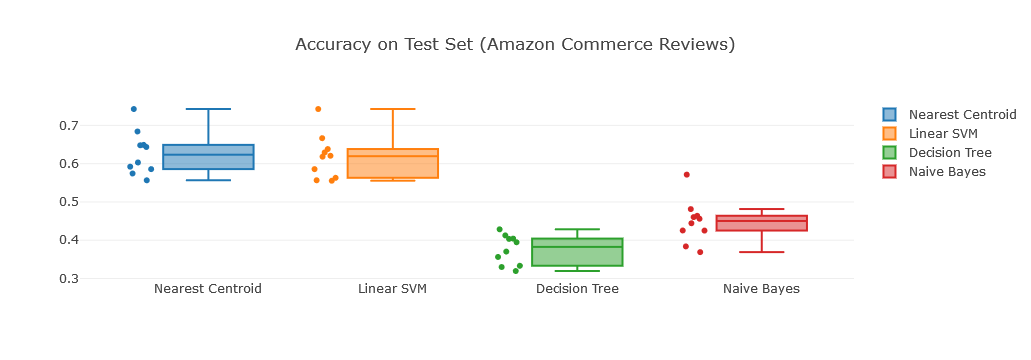

ValueError: 
The orca executable is required to export figures as static images,
but it could not be found on the system path.

Searched for executable 'orca' on the following path:
    E:\Python\Miniconda3
    E:\Python\Miniconda3\Library\mingw-w64\bin
    E:\Python\Miniconda3\Library\usr\bin
    E:\Python\Miniconda3\Library\bin
    E:\Python\Miniconda3\Scripts
    E:\Python\Miniconda3\bin
    C:\Rtools\bin
    C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\bin
    C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v9.0\libnvvp
    E:\Program Files (x86)\NVIDIA\dev\bin
    E:\Program Files (x86)\NVIDIA\dev\libnvvp
    C:\Program Files\Java\jdk1.8.0_66\bin
    C:\ProgramData\Oracle\Java\javapath
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    C:\Users\Martin\AppData\Local\Android\sdk\tools
    C:\Users\Martin\AppData\Local\Android\sdk\platform-tools
    E:\Program Files (x86)\MySQL\MySQL Utilities\
    E:\Program Files (x86)\MySQL\MySQL Utilities\Doctrine extensions for PHP\
    E:\Program Files (x86)\GTK2-Runtime\bin
    E:\Program Files\Git\cmd
    E:\Program Files (x86)\GNU\GnuPG\pub
    C:\Program Files (x86)\GnuWin32\bin
    C:\Program Files\dotnet\
    C:\Program Files (x86)\Skype\Phone\
    C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common
    C:\Program Files\Microsoft SQL Server\130\Tools\Binn\
    F:\Program Files\GTK3-Runtime Win64\bin
    C:\WINDOWS\system32
    C:\WINDOWS
    C:\WINDOWS\System32\Wbem
    C:\WINDOWS\System32\WindowsPowerShell\v1.0\
    G:\npm\nodejs\
    G:\spark\spark-2.3.0-bin-hadoop2.7\bin
    
    C:\WINDOWS\System32\OpenSSH\
    E:\Python\Python36\Scripts\
    E:\Python\Python36\
    E:\Program Files\python\Scripts\
    E:\Program Files\python\
    E:\Program Files (x86)\MikTex\miktex\bin\x64\
    E:\INSTALL-FILES\apache-ant-1.9.6-bin\apache-ant-1.9.6\bin
    C:\Users\Martin\AppData\Local\atom\bin
    E:\INSTALL-FILES\office-tools\crark51
    E:\Program Files (x86)\MySQL\MySQL Utilities
    E:\Program Files (x86)\apache-maven-3.3.9-bin\apache-maven-3.3.9\bin
    C:\Program Files (x86)\GnuWin32\bin
    E:\sdk\android\sdk1\platform-tools
    E:\Program Files (x86)\Visual Studio\2017\Professional\VC\Tools\MSVC\14.11.25503\bin\Hostx64\x64
    E:\Python\Miniconda3
    E:\Program Files (x86)\Graphviz2.38\bin
    C:\Program Files (x86)\Windows Kits\8.1\Lib\winv6.3\um\x64
    C:\Users\Martin\AppData\Local\Microsoft\WindowsApps
    C:\Users\Martin\AppData\Roaming\npm
    C:\RBuildTools\3.3\bin
    C:\RBuildTools\3.3\gcc-4.6.3\bin
    E:\INSTALL-FILES\apache-jena-3.8.0\apache-jena-3.8.0\bat
    

If you haven't installed orca yet, you can do so using conda as follows:

    $ conda install -c plotly plotly-orca

Alternatively, see other installation methods in the orca project README at
https://github.com/plotly/orca.

After installation is complete, no further configuration should be needed. 

If you have installed orca, then for some reason plotly.py was unable to
locate it. In this case, set the `plotly.io.orca.config.executable`
property to the full path of your orca executable. For example:

    >>> plotly.io.orca.config.executable = '/path/to/orca'

After updating this executable property, try the export operation again.
If it is successful then you may want to save this configuration so that it
will be applied automatically in future sessions. You can do this as follows:

    >>> plotly.io.orca.config.save() 

If you're still having trouble, feel free to ask for help on the forums at
https://community.plot.ly/c/api/python


In [7]:
import plotly.io as pio
traces = []
for clf_name in names:
    traces.append(go.Box(
        y=cl_scores[clf_name]['test_acc'],
        boxpoints='all',
        name=clf_name
    ))
    
layout = go.Layout(title="Accuracy on Test Set (Amazon Commerce Reviews)")
    
py.iplot(go.Figure(data=traces, layout=layout))
pio.write_image(go.Figure(data=traces, layout=layout), 'amz_boxplot.pdf')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_vars.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
trace = []
names = ["Nearest Centroid", "Linear SVM",
         "Decision Tree", "Naive Bayes"]
feature_counts = [1,2,5,10,20,30,40,50,100,500,1000,10000]#, "All"]
for idx, feature_count in enumerate(feature_counts):
    for cl in names:
        for score in cl_scores[cl][idx]['test_score']:
            trace.append({'score': score, 'x':idx, 'name':feature_count, 'classifier':cl})
df_trace = pd.DataFrame.from_dict(trace)

E:\Python\Miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



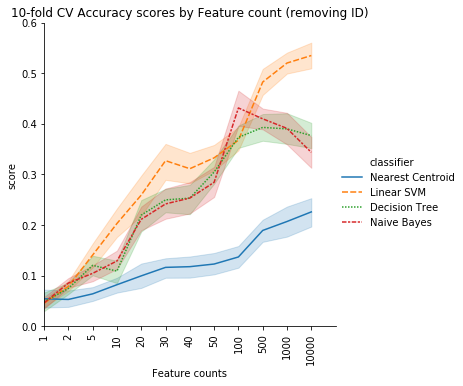

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.relplot(x="x", y="score", kind="line", hue="classifier", style="classifier", data=df_trace)
plt.xticks(range(len(feature_counts)), feature_counts, rotation='vertical')
plt.xlabel("Feature counts")
plt.title("10-fold CV Accuracy scores by Feature count (removing ID)")
axes = plt.gca()
axes.set_ylim([0.0,0.6])
axes.set_xlim([0,len(feature_counts)])
plt.savefig('feature_cnt_eval_wo_ID.pdf')
plt.show()

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_vars_all = df_train.loc[:, df_train.columns != 'Class']
#df_vars_all = df_vars_all.drop('ID', axis=1)
df_class = df_train['Class']
selector = SelectKBest(chi2, k=1)
selector.fit(df_vars_all, df_class)
cols = selector.get_support(indices=True)
best_features = df_vars_all.columns[cols]
#df_vars = SelectKBest(chi2, k=1).fit_transform(df_vars_all, df_class)
best_features

Index(['ID'], dtype='object')

In [4]:
df_train.columns

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       ...
       'V9992', 'V9993', 'V9994', 'V9995', 'V9996', 'V9997', 'V9998', 'V9999',
       'V10000', 'Class'],
      dtype='object', length=10002)

In [68]:
class_labels = sorted(df_train['Class'].unique(), key=lambda s: s.lower())
df_res = pd.DataFrame()
df_res['ID'] = df_test['ID']
df_res['class'] = df_test['ID'].apply(lambda x: class_labels[(x-1)//30])
df_res.head(10)

,ID,class
0,656,Harp
1,949,Mark
2,255,CFH
3,21,Agresti
4,1412,Vision
5,278,Chachra
6,81,Auken
7,1475,Wilson
8,955,Mark
9,1400,Vernon


In [69]:
export_file_name = result_folder + "id_prediction.csv"
df_res.to_csv(export_file_name, index=False)